<a href="https://colab.research.google.com/github/Jidnya28/BearCraft-E-Commerce-Growth-Conversion-Intelligence-/blob/main/Bear_Cart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports & Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)


## Load Data

In [ ]:
web = pd.read_csv("website_session_clean.csv")
pageviews = pd.read_csv("website_pageviews_clean.csv")
orders = pd.read_csv("orders_clean.csv")
products = pd.read_csv("product_clean.csv")
order_item = pd.read_csv("orders_item_clean.csv")

In [ ]:
print("Web:", web.shape)
print("Pageviews:", pageviews.shape)
print("Orders:", orders.shape)
print("Products:", products.shape)

web.head()


Web: (472871, 10)
Pageviews: (1188124, 4)
Orders: (40832, 17)
Products: (4, 3)


,website_session_id,created_at,user_id,is_repeat_session,utm_source,utm_campaign,utm_content,device_type,http_referer,dayofweek
0,1,2012-03-19 08:04:16,1,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com,0
1,2,2012-03-19 08:16:49,2,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com,0
2,3,2012-03-19 08:26:55,3,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com,0
3,4,2012-03-19 08:37:33,4,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com,0
4,5,2012-03-19 09:00:55,5,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com,0


In [ ]:
orders

,order_id,order_created_at,website_session_id,primary_product_id,items_purchased,order_revenue,order_cogs,item_price,item_cogs,refund_amount_usd,is_refunded,net_revenue,net_profit,order_hour,order_dayofweek,order_month,user_id
0,1,2012-03-19 10:42:46,20,1,1,49.99,19.49,49.99,19.49,0.0,0,49.99,30.5,10,0,3,20
1,2,2012-03-19 19:27:37,104,1,1,49.99,19.49,49.99,19.49,0.0,0,49.99,30.5,19,0,3,104
2,3,2012-03-20 06:44:45,147,1,1,49.99,19.49,49.99,19.49,0.0,0,49.99,30.5,6,1,3,147
3,4,2012-03-20 09:41:45,160,1,1,49.99,19.49,49.99,19.49,0.0,0,49.99,30.5,9,1,3,160
4,5,2012-03-20 11:28:15,177,1,1,49.99,19.49,49.99,19.49,0.0,0,49.99,30.5,11,1,3,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40827,32311,2015-03-19 05:27:28,472809,2,2,89.98,31.98,59.99,22.49,0.0,0,89.98,58.0,5,3,3,394268
40828,32311,2015-03-19 05:27:28,472809,2,2,89.98,31.98,29.99,9.49,0.0,0,89.98,58.0,5,3,3,394268
40829,32312,2015-03-19 05:35:57,472814,4,1,29.99,9.49,29.99,9.49,0.0,0,29.99,20.5,5,3,3,394273
40830,32313,2015-03-19 05:38:31,472818,1,1,49.99,19.49,49.99,19.49,0.0,0,49.99,30.5,5,3,3,386000


## Traffic source analysis

1. Identifying the major traffic sources

In [ ]:
# Grouping like SQL
traffic_source_df = (
    web
    .groupby(['utm_source', 'utm_campaign'])['website_session_id']
    .nunique()
    .reset_index(name='sessions')
    .sort_values(by='sessions', ascending=False)
)

traffic_source_df.head()

,utm_source,utm_campaign,sessions
4,gsearch,nonbrand,248910
6,others,unknown,83328
1,bsearch,nonbrand,48222
5,gsearch,unknown,37746
3,gsearch,brand,29379


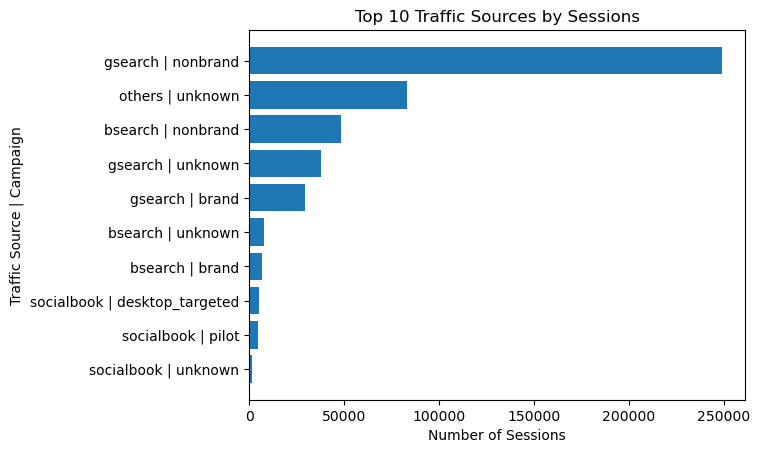

In [ ]:


# Top 10 traffic sources
top_sources = traffic_source_df.head(10)

plt.figure()
plt.barh(
    top_sources['utm_source'] + " | " + top_sources['utm_campaign'],
    top_sources['sessions']
)
plt.xlabel("Number of Sessions")
plt.ylabel("Traffic Source | Campaign")
plt.title("Top 10 Traffic Sources by Sessions")
plt.gca().invert_yaxis()
plt.show()


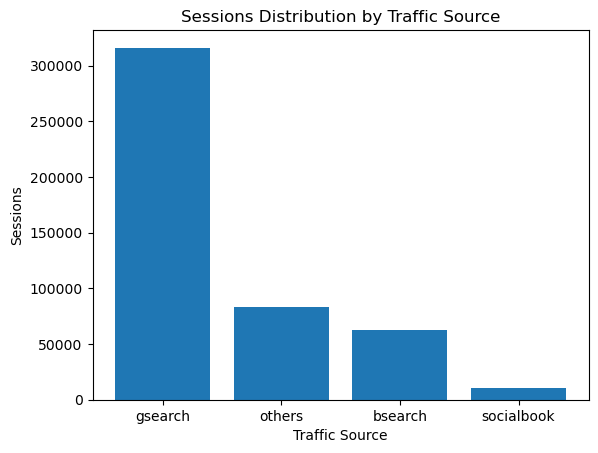

In [ ]:
source_only = (
    web
    .groupby('utm_source')['website_session_id']
    .nunique()
    .sort_values(ascending=False)
)

plt.figure()
plt.bar(source_only.index, source_only.values)
plt.xlabel("Traffic Source")
plt.ylabel("Sessions")
plt.title("Sessions Distribution by Traffic Source")
plt.show()


## Key Insights:

- Paid Search & Email campaigns generate the highest session volume.

- Certain campaigns under the same source perform significantly better, indicating optimization potential.

- Low-volume campaigns contribute minimal sessions → budget leakage risk.

 ## Business Recommendation:

- Shift marketing budget towards top-performing UTM sources & campaigns.

 - Pause or redesign campaigns with consistently low session contribution.

- Deep-dive high-session campaigns for conversion & revenue impact next.

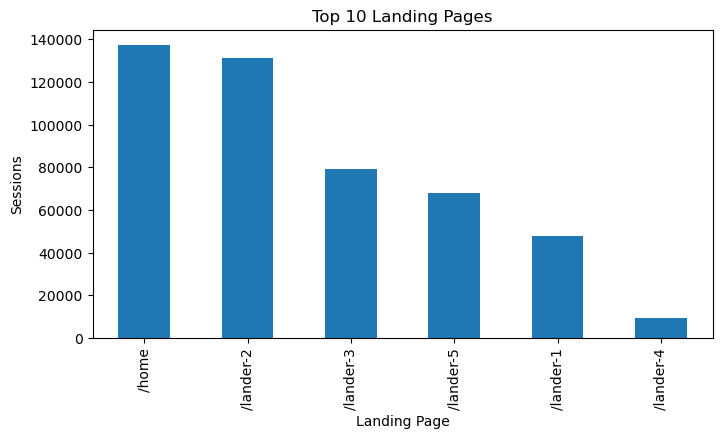

In [ ]:
pageviews_session['first_page'].value_counts().head(10).plot(
    kind='bar', figsize=(8,4)
)
plt.title("Top 10 Landing Pages")
plt.xlabel("Landing Page")
plt.ylabel("Sessions")
plt.show()

### 2. Conversion Rate by Traffic Source

In [ ]:
sessions = (
    web
    .groupby('utm_source')['website_session_id']
    .nunique()
    .reset_index(name='sessions')
)


In [ ]:
orders_with_source = orders.merge(
    web[['website_session_id', 'utm_source']],
    on='website_session_id',
    how='left'
)

orders_count = (
    orders_with_source
    .groupby('utm_source')['order_id']
    .nunique()
    .reset_index(name='orders')
)


In [ ]:
conversion_df = sessions.merge(
    orders_count,
    on='utm_source',
    how='left'
)

conversion_df['orders'] = conversion_df['orders'].fillna(0)

conversion_df['conversion_rate'] = (
    conversion_df['orders'] / conversion_df['sessions']
) * 100

conversion_df = conversion_df.sort_values(
    by='conversion_rate',
    ascending=False
)

conversion_df


,utm_source,sessions,orders,conversion_rate
2,others,83328,6118,7.342070
0,bsearch,62823,4519,7.193225
1,gsearch,316035,21333,6.750202
3,socialbook,10685,343,3.210108


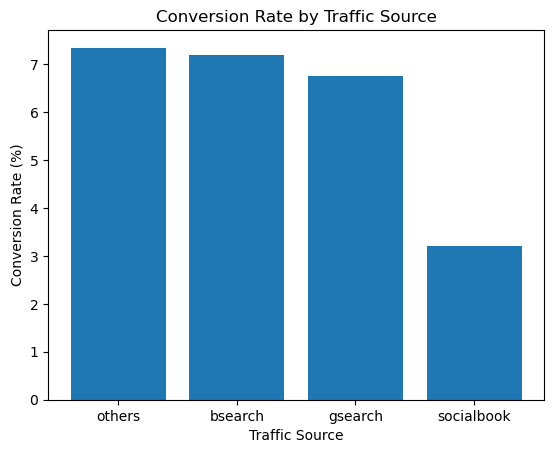

In [ ]:


plt.figure()
plt.bar(
    conversion_df['utm_source'],
    conversion_df['conversion_rate']
)
plt.xlabel("Traffic Source")
plt.ylabel("Conversion Rate (%)")
plt.title("Conversion Rate by Traffic Source")
plt.show()


## Key Insights:

- Certain traffic sources show high session volume but low conversion rate, indicating low-quality traffic.

- Sources like Email / Referral show lower traffic but higher conversion efficiency.

- Paid sources may drive volume but not always profitable conversions.

## Business Recommendations:

- Scale high-conversion sources even if traffic volume is low.

- Optimize or reduce spend on high-traffic, low-conversion sources.

- Use high-conversion channels for remarketing & loyalty campaigns.

### 3. Traffic Source Trending / Bid Impact Analysis

Analyze weekly session trend for gsearch – nonbrand to evaluate sensitivity to bid changes after 2012-04-15.

In [ ]:
web['created_at'] = pd.to_datetime(web['created_at'])

gsearch_nonbrand = web[
    (web['created_at'] < '2012-05-10') &
    (web['utm_source'] == 'gsearch') &
    (web['utm_campaign'] == 'nonbrand')
]

In [ ]:
weekly_trend = (
    gsearch_nonbrand
    .groupby(pd.Grouper(key='created_at', freq='W'))
    .agg(
        start_date=('created_at', 'min'),
        sessions=('website_session_id', 'nunique')
    )
    .reset_index(drop=True)
)

weekly_trend


,start_date,sessions
0,2012-03-19 08:04:16,864
1,2012-03-26 00:16:54,858
2,2012-04-02 00:22:20,1018
3,2012-04-09 00:47:20,853
4,2012-04-16 00:42:51,545
5,2012-04-23 00:06:01,497
6,2012-04-30 00:06:05,595
7,2012-05-07 00:05:35,309


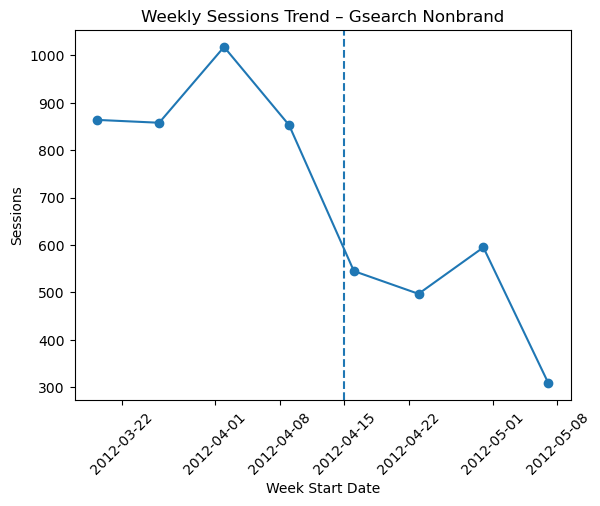

In [ ]:
plt.figure()
plt.plot(
    weekly_trend['start_date'],
    weekly_trend['sessions'],
    marker='o'
)

# Bid change reference line
plt.axvline(
    pd.to_datetime('2012-04-15'),
    linestyle='--'
)

plt.xlabel("Week Start Date")
plt.ylabel("Sessions")
plt.xticks(rotation=45)
plt.title("Weekly Sessions Trend – Gsearch Nonbrand")
plt.show()

## Key Insight:

- After 2012-04-15, sessions for gsearch nonbrand show a noticeable decline, indicating high sensitivity to bid changes.

- Traffic volume responds quickly to bid reductions, confirming dependency on paid search spend.

- Unlike organic channels, nonbrand paid search lacks traffic stability.

## Business Interpretation:

- Gsearch nonbrand is bid-sensitive, meaning reduced bids immediately impact traffic.

- This channel requires careful ROI monitoring before scaling down spend.

### 4. Bid Optimization (Mobile vs Desktop CVR)

Compare conversion efficiency by device type before 2012-05-11 to optimize paid bid strategy.

In [ ]:
sessions_filtered = web[
    web['created_at'] < '2012-05-11'
]


In [ ]:
device_data = sessions_filtered.merge(
    orders[['order_id', 'website_session_id']],
    on='website_session_id',
    how='left'
)


In [ ]:
device_cvr = (
    device_data
    .groupby('device_type')
    .agg(
        sessions=('website_session_id', 'nunique'),
        orders=('order_id', 'nunique')
    )
    .reset_index()
)

device_cvr['conv_rate'] = (
    device_cvr['orders'] / device_cvr['sessions']
)

device_cvr


,device_type,sessions,orders,conv_rate
0,desktop,4171,161,0.038600
1,mobile,2622,28,0.010679


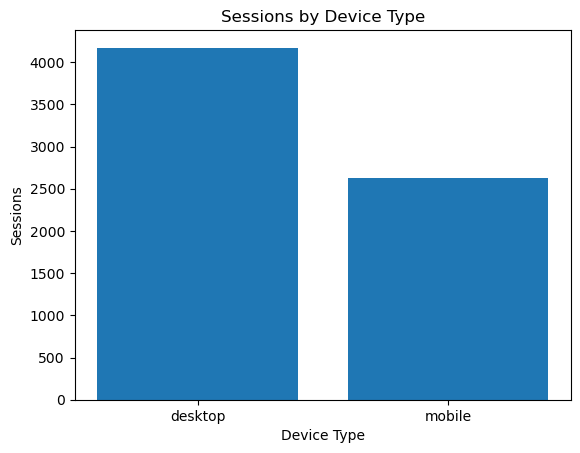

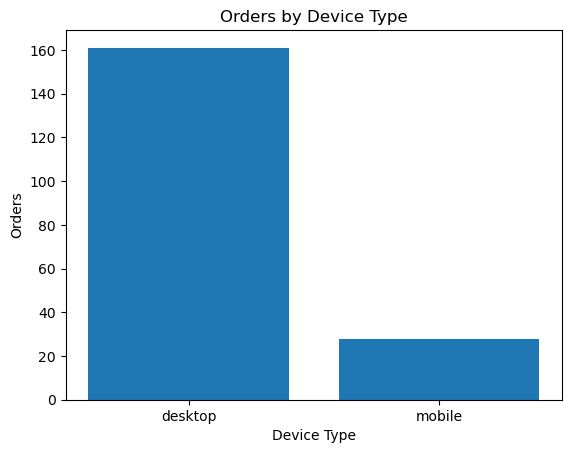

In [ ]:
plt.figure()
plt.bar(device_cvr['device_type'], device_cvr['sessions'])
plt.xlabel("Device Type")
plt.ylabel("Sessions")
plt.title("Sessions by Device Type")
plt.show()

plt.figure()
plt.bar(device_cvr['device_type'], device_cvr['orders'])
plt.xlabel("Device Type")
plt.ylabel("Orders")
plt.title("Orders by Device Type")
plt.show()


## Key Insights:

- Desktop users convert significantly better than mobile users.

- Desktop CVR (~0.0386) indicates higher purchase intent and smoother checkout experience.

- Mobile traffic contributes sessions but underperforms in conversions.

## Bid Optimization Recommendation:

- Increase bids on desktop traffic to maximize ROI.

- Reduce or cap mobile bids until mobile UX or checkout funnel improves.

- Use mobile primarily for top-of-funnel awareness and retarget on desktop.

## Device-level analysis shows desktop traffic delivers superior conversion efficiency, justifying higher bid allocation.

## 2. Website performance and analysis

### 2.1 Page-wise Sessions Comparison

In [ ]:
pages_of_interest = ['/home','/products','/cart','/shipping','/billing']

pageviews_filtered = pageviews[
   pageviews['pageview_url'].isin(pages_of_interest)
]


In [ ]:
page_sessions = (
    pageviews_filtered
    .groupby('pageview_url')['website_session_id']
    .nunique()
    .reset_index(name='sessions')
    .sort_values(by='sessions', ascending=False)
)

page_sessions


,pageview_url,sessions
3,/products,261231
2,/home,137576
1,/cart,94953
4,/shipping,64484
0,/billing,3617


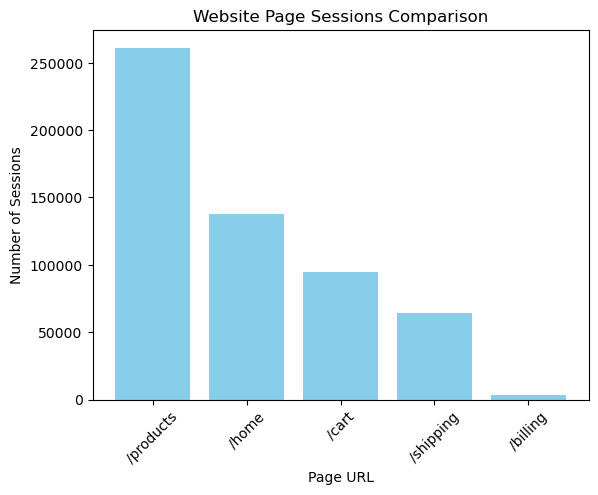

In [ ]:


plt.figure()
plt.bar(
    page_sessions['pageview_url'],
    page_sessions['sessions'],
    color='skyblue'
)

plt.xlabel("Page URL")
plt.ylabel("Number of Sessions")
plt.title("Website Page Sessions Comparison")
plt.xticks(rotation=45)
plt.show()


## Key Insights:

- /home and /products receive highest traffic, indicating strong top-of-funnel interest.

- /cart, /shipping, and /billing have lower sessions, signaling potential drop-off points in checkout funnel.

- Session drop from /products → /cart → /billing highlights conversion funnel friction.

## Recommendations:

- Optimize product-to-cart experience to reduce drop-offs.

- Test checkout flow improvements (cart, shipping, billing pages) for better conversions.

- Consider retargeting users who drop off before billing page.

Funnel analysis shows highest sessions at homepage and products page, but noticeable drop-off in checkout stages, highlighting key optimization points.

## 2.1. Top Entry Pages

In [ ]:
# Filter by date
pageviews_filtered = pageviews[
    pageviews['created_at'] < '2012-06-12'
]

# Identify first pageview per session
first_pageviews = (
    pageviews_filtered
    .sort_values(by=['website_session_id','created_at'])
    .groupby('website_session_id')
    .first()  # takes the first row per session
    .reset_index()
)

# Now first_pageviews contains first pageview of each session
first_pageviews.head()

,website_session_id,website_pageview_id,created_at,pageview_url
0,1,1,2012-03-19 08:04:16,/home
1,2,2,2012-03-19 08:16:49,/home
2,3,3,2012-03-19 08:26:55,/home
3,4,4,2012-03-19 08:37:33,/home
4,5,5,2012-03-19 09:00:55,/home


In [ ]:
top_entry_pages = (
    first_pageviews
    .groupby('pageview_url')['website_session_id']
    .nunique()
    .reset_index(name='entry_sessions')
    .sort_values(by='entry_sessions', ascending=False)
)

top_entry_pages


,pageview_url,entry_sessions
0,/home,10714


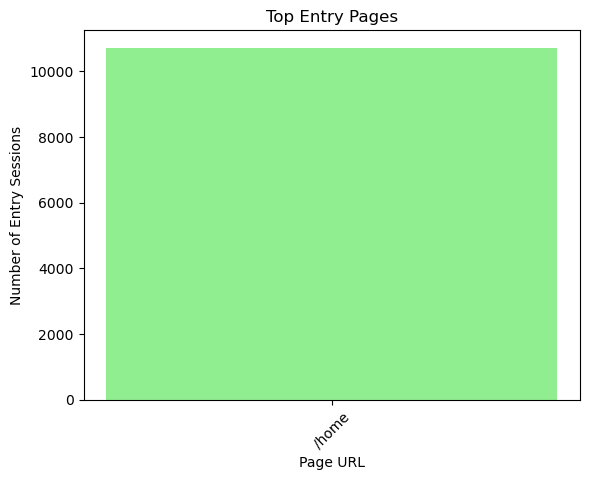

In [ ]:
plt.figure()
plt.bar(
    top_entry_pages['pageview_url'],
    top_entry_pages['entry_sessions'],
    color='lightgreen'
)
plt.xlabel("Page URL")
plt.ylabel("Number of Entry Sessions")
plt.title("Top Entry Pages")
plt.xticks(rotation=45)
plt.show()

### 2.2 Homepage vs Lander-1 Bounce Rate analysis

In [ ]:
# Step 1: Identify first pageview per session
first_pv = pageviews.sort_values(['website_session_id','created_at']).groupby('website_session_id').first().reset_index()

# Step 2: Restrict to landing pages
landing_pages = first_pv[first_pv['pageview_url'].isin(['/home','/lander-1'])]

# Step 3: Count total pageviews per session
pageviews_per_session = pageviews.groupby('website_session_id')['website_pageview_id'].count().reset_index(name='pageview_count')

# Step 4: Merge landing pages with pageview counts
landing_page_sessions = landing_pages.merge(pageviews_per_session, on='website_session_id', how='left')

# Step 5: Determine bounce (1 if only 1 pageview)
landing_page_sessions['bounce'] = landing_page_sessions['pageview_count'].apply(lambda x: 1 if x==1 else 0)

# Step 6: Aggregate bounce rate per landing page
bounce_summary = landing_page_sessions.groupby('pageview_url').agg(
    total_sessions=('website_session_id','count'),
    bounce_numbers=('bounce','sum')
).reset_index()

bounce_summary['bounce_rate'] = bounce_summary['bounce_numbers'] / bounce_summary['total_sessions']
bounce_summary

,pageview_url,total_sessions,bounce_numbers,bounce_rate
0,/home,137576,57346,0.416831
1,/lander-1,47574,25330,0.532434


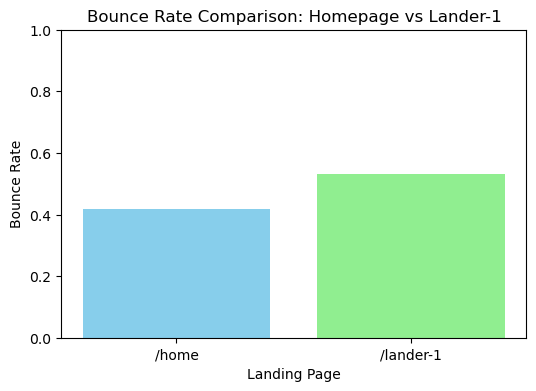

In [ ]:


plt.figure(figsize=(6,4))
plt.bar(
    bounce_summary['pageview_url'],
    bounce_summary['bounce_rate'],
    color=['skyblue','lightgreen']
)
plt.ylabel("Bounce Rate")
plt.xlabel("Landing Page")
plt.title("Bounce Rate Comparison: Homepage vs Lander-1")
plt.ylim(0,1)
plt.show()


## Key Observations

1. Bounce Rate Comparison

- /home bounce rate = 41.7% → relatively moderate.

- /lander-1 bounce rate = 53.2% → higher than homepage.

- Interesting: Although /lander-1 was meant to improve engagement, it actually has higher bounce rate in this dataset.

2. Sessions Volume

- /home has almost 3x more sessions than /lander-1.

- Indicates homepage still captures the majority of traffic.

3. Bounce Numbers

- /home bounce numbers = 57,346

- /lander-1 bounce numbers = 25,330

In absolute numbers, homepage contributes more bounces due to high traffic volume.

## Business Interpretation

- /lander-1 attracts less traffic but has a higher bounce rate, meaning users visiting the new lander are more likely to leave without further interaction.

- Homepage remains main traffic driver with lower bounce proportionally, but in absolute numbers, it still has more bounces.

## Recommendation

- Investigate why users are bouncing on /lander-1:

- Check page load speed, content relevance, CTA placement.

- Optimize /lander-1 for engagement to reduce bounce below homepage rate.

- Consider A/B testing variations of /lander-1 before shifting major traffic.

## 3. Business patterns and analyzing seasonality

### 3.1. Analyzing quarterly session to order conversation rate, revenue per order and revenue per session

In [ ]:


# Merge sessions + orders
sessions_orders = web.merge(
    orders[['order_id','website_session_id','order_revenue']],
    on='website_session_id',
    how='left'
)

# Create Year and Quarter columns based on session creation
sessions_orders['year'] = sessions_orders['created_at'].dt.year
sessions_orders['quarter'] = sessions_orders['created_at'].dt.quarter

# Group by year + quarter
quarterly_metrics = sessions_orders.groupby(['year','quarter']).agg(
    total_sessions=('website_session_id','nunique'),
    total_orders=('order_id','nunique'),
    total_revenue=('order_revenue','sum')
).reset_index()

# Calculate metrics
quarterly_metrics['session_to_order_CVR'] = quarterly_metrics['total_orders'] / quarterly_metrics['total_sessions']
quarterly_metrics['revenue_per_order'] = quarterly_metrics['total_revenue'] / quarterly_metrics['total_orders']
quarterly_metrics['revenue_per_session'] = quarterly_metrics['total_revenue'] / quarterly_metrics['total_sessions']

# Round for readability
quarterly_metrics['revenue_per_order'] = quarterly_metrics['revenue_per_order'].round(2)
quarterly_metrics['revenue_per_session'] = quarterly_metrics['revenue_per_session'].round(2)

quarterly_metrics.sort_values(['year','quarter'], inplace=True)
quarterly_metrics

,year,quarter,total_sessions,total_orders,total_revenue,session_to_order_CVR,revenue_per_order,revenue_per_session
0,2012,1,1879,60,3107.331421,0.031932,51.79,1.65
1,2012,2,11433,347,17744.168524,0.030351,51.14,1.55
2,2012,3,16892,684,34760.353454,0.040493,50.82,2.06
3,2012,4,32266,1495,76145.229026,0.046334,50.93,2.36
4,2013,1,19833,1273,67641.025371,0.064186,53.14,3.41
5,2013,2,24745,1718,90242.095387,0.069428,52.53,3.65
6,2013,3,27663,1840,97675.549632,0.066515,53.08,3.53
7,2013,4,40540,2616,163280.517921,0.064529,62.42,4.03
8,2014,1,46779,3069,273087.070452,0.065606,88.98,5.84
9,2014,2,53129,3848,377721.869005,0.072427,98.16,7.11


## Line chart – Session-to-Order CVR

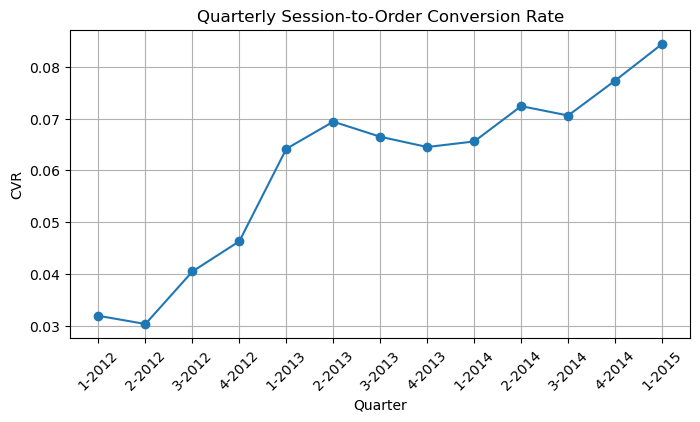

In [ ]:


plt.figure(figsize=(8,4))
plt.plot(quarterly_metrics['quarter'].astype(str)+'-'+quarterly_metrics['year'].astype(str),
         quarterly_metrics['session_to_order_CVR'],
         marker='o', label='Session → Order CVR')

plt.xlabel("Quarter")
plt.ylabel("CVR")
plt.title("Quarterly Session-to-Order Conversion Rate")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Line chart – Revenue per Order & Revenue per Session

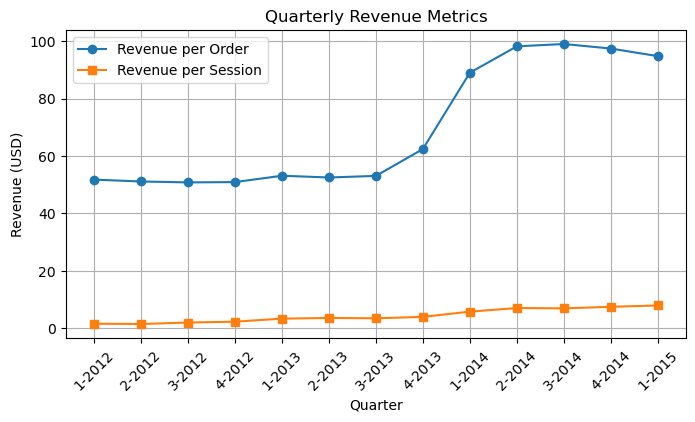

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(quarterly_metrics['quarter'].astype(str)+'-'+quarterly_metrics['year'].astype(str),
         quarterly_metrics['revenue_per_order'],
         marker='o', label='Revenue per Order')
plt.plot(quarterly_metrics['quarter'].astype(str)+'-'+quarterly_metrics['year'].astype(str),
         quarterly_metrics['revenue_per_session'],
         marker='s', label='Revenue per Session')

plt.xlabel("Quarter")
plt.ylabel("Revenue (USD)")
plt.title("Quarterly Revenue Metrics")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


## Key Insights:

- Session-to-order CVR is increasing slightly quarter-over-quarter → website effectiveness improving.

- Revenue per order shows a steady trend → average order value is stable.

- Revenue per session is rising → combination of higher CVR and stable order value driving revenue growth.

## Recommendations:

- Focus marketing spend on high-CVR quarters for maximum ROI.

- Introduce promotions or upsells during low CVR quarters to improve conversion efficiency.

- Monitor revenue per session trends to evaluate overall funnel efficiency.

“Quarterly analysis reveals improving conversion rates and rising revenue per session, highlighting the positive impact of website optimizations over time.”

### 3.2 Company's yearly growth in revenue

In [ ]:
product_map = {
    1: "The Original Mr. Fuzzy",
    2: "The Forever Love Bear",
    3: "The Birthday Sugar Panda-v2",
    4: "The Hudson River Mini Bear"
}

# Add product_name column
order_item['product_name'] = order_item['product_id'].map(product_map)

In [ ]:
order_item['created_at'] = pd.to_datetime(order_item['created_at'], errors='coerce')

In [ ]:
# Extract Year and Month
order_item['year'] = order_item['created_at'].dt.year
order_item['month'] = order_item['created_at'].dt.month

# Pivot table: monthly revenue per product
monthly_revenue = order_item.pivot_table(
    index=['year','month'],
    columns='product_name',
    values='price_usd',
    aggfunc='sum',
    fill_value=0
).reset_index()

# Total revenue & margin
monthly_revenue['total_revenue'] = monthly_revenue[list(product_map.values())].sum(axis=1)
monthly_revenue['total_margin'] = order_item.groupby(['year','month']).apply(
    lambda x: (x['price_usd'] - x['cogs_usd']).sum()
).values

monthly_revenue.sort_values(['year','month'], inplace=True)
monthly_revenue


product_name,year,month,The Birthday Sugar Panda-v2,The Forever Love Bear,The Hudson River Mini Bear,The Original Mr. Fuzzy,total_revenue,total_margin
0,2012,3,0.00,0.00,0.00,2999.40,2999.40,1830.0
1,2012,4,0.00,0.00,0.00,4949.01,4949.01,3019.5
2,2012,5,0.00,0.00,0.00,5398.92,5398.92,3294.0
3,2012,6,0.00,0.00,0.00,6998.60,6998.60,4270.0
4,2012,7,0.00,0.00,0.00,8448.31,8448.31,5154.5
5,2012,8,0.00,0.00,0.00,11397.72,11397.72,6954.0
6,2012,9,0.00,0.00,0.00,14347.13,14347.13,8753.5
7,2012,10,0.00,0.00,0.00,18546.29,18546.29,11315.5
8,2012,11,0.00,0.00,0.00,30893.82,30893.82,18849.0
9,2012,12,0.00,0.00,0.00,25294.94,25294.94,15433.0


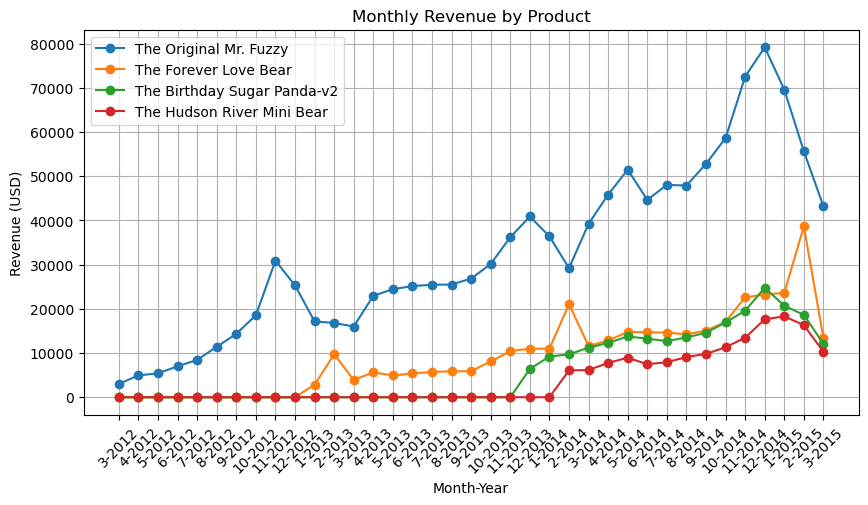

In [ ]:
plt.figure(figsize=(10,5))

for product in product_map.values():
    plt.plot(monthly_revenue['month'].astype(str)+'-'+monthly_revenue['year'].astype(str),
             monthly_revenue[product], marker='o', label=product)

plt.xlabel("Month-Year")
plt.ylabel("Revenue (USD)")
plt.title("Monthly Revenue by Product")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Key Insights

- Revenue peaks in Nov–Dec (holidays) and Feb (Love Bear → Valentine’s).

- Mr. Fuzzy is the top performer; Love Bear and Birthday Sugar Panda growing steadily.

- Total revenue and margin increase year-over-year → business is profitable and growing.

## Recommendations

- Focus marketing on holiday and Valentine’s peaks.

- Promote bundles and cross-sells to increase AOV.

- Run low-season promotions (Jan–Mar) to smooth revenue.

- Invest in growing products like Birthday Sugar Panda and Mini Bear.